In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("C:/Users/Teja/Desktop/train.csv")
print("Training dataset shape:",train.shape)
train.head()

Training dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("C:/Users/Teja/Desktop/test.csv")
print("Testing Dataset shape:",test.shape)
test.head()

Testing Dataset shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<IPython.core.display.Javascript object>


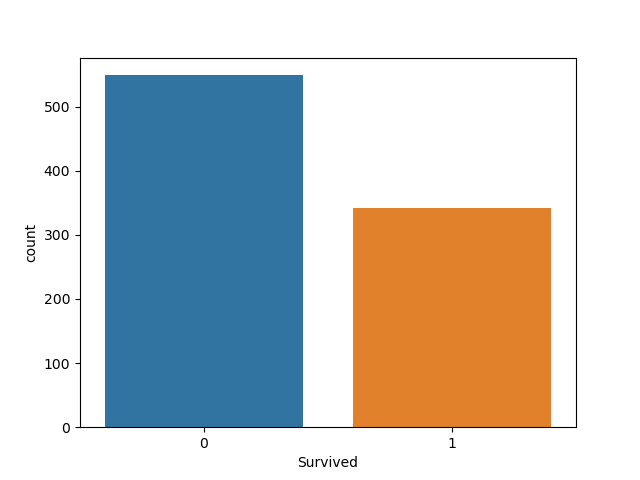

In [5]:
sns.countplot(x="Survived",data = train)

<IPython.core.display.Javascript object>


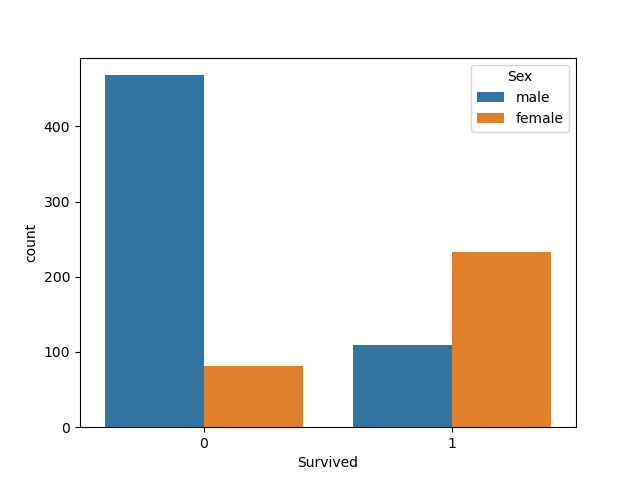

In [6]:
sns.countplot(x = "Survived",hue = 'Sex',data = train)

<IPython.core.display.Javascript object>


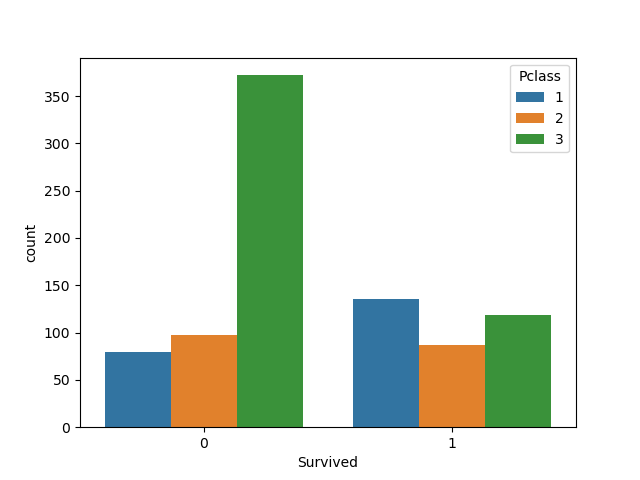

In [7]:
sns.countplot(x = "Survived",hue = "Pclass",data = train)

<IPython.core.display.Javascript object>


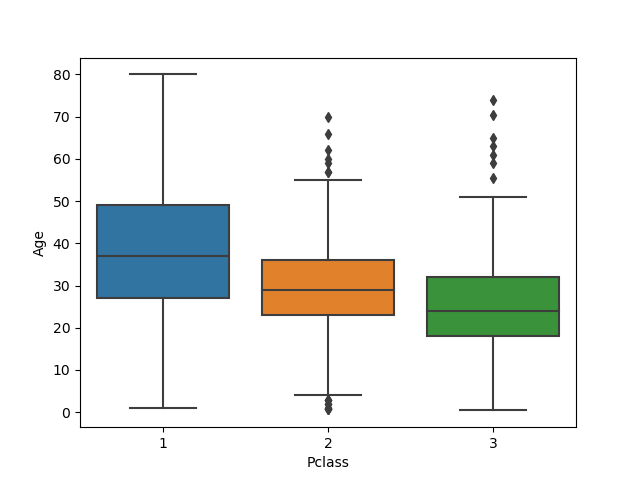

In [8]:
sns.boxplot(x="Pclass",y ="Age",data= train)

In [9]:
print("Null in Training Set")
print(train.isnull().sum())

Null in Training Set
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print("Null in testing set")
print(test.isnull().sum())

Null in testing set
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"]== Pclass]["Age"].mean())
    else:
        return Age

In [12]:
train["Age"] = train[["Age","Pclass"]].apply(add_age,axis=1)
test['Age'] = test[["Age","Pclass"]].apply(add_age,axis = 1)

In [13]:
train.drop("Cabin",inplace = True,axis=1)
test.drop("Cabin",inplace = True, axis =1)

In [14]:
train["Embarked"].fillna(train["Embarked"].mode()[0],inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0],inplace = True)

In [15]:
test["Fare"].fillna(test["Fare"].mean(),inplace = True)

In [16]:
def combine(df, col1, col2):
    df["Family"] = df[col1] + df[col2]
    df.drop([col1,col2],inplace = True, axis = 1)
    return df

train = combine(train,"SibSp","Parch")
test = combine(test,"SibSp","Parch")

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,2


<IPython.core.display.Javascript object>


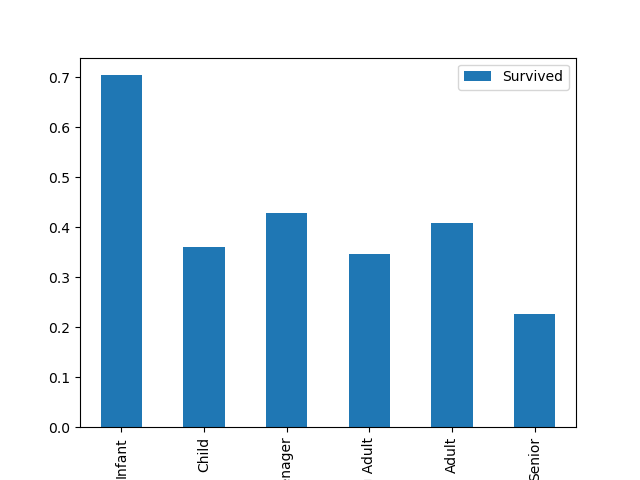

In [19]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels = label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index = "Age_categories",values = "Survived")
pivot.plot.bar()

In [20]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name],prefix = column_name)
    df = pd.concat([df,dummies],axis = 1)
    return df

for column in ["Pclass","Sex","Age_categories","Embarked"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [21]:
train.drop(["Name","Sex","Ticket","Pclass","Age_categories","Embarked"],inplace = True, axis = 1)
test.drop(["Name","Sex","Ticket","Pclass","Age_categories","Embarked"],inplace = True, axis = 1)

In [22]:
lr = LogisticRegression()
columns = ["PassengerId","Age","Fare","Family","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male","Age_categories_Missing","Age_categories_Infant","Age_categories_Child","Age_categories_Teenager","Age_categories_Young Adult","Age_categories_Adult","Age_categories_Senior"]
lr.fit(train[columns],train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
X = train[columns]
y = train["Survived"]

train_X, val_X, train_y,val_y = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [24]:
lr = LogisticRegression()
lr.fit(train_X,train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y,predictions)
print(accuracy)
print(classification_report(val_y,predictions))

0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [25]:
scores = cross_val_score(lr,X,y,cv = 10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.7752809  0.7752809  0.79775281 0.80898876 0.80898876 0.83146067
 0.83146067 0.83146067 0.83333333 0.87640449]
0.8170411985018727


In [26]:
lr.fit(X,y)
predict_test = lr.predict(test[columns])

In [27]:
submission = pd.read_csv("C:/Users/Teja/Desktop/gender_submission.csv")
submission_df = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived":predict_test})
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [28]:
submission_df.to_csv("C:/Users/Teja/Desktop/gender_submission.csv")